In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heights_with_outliers.csv")
df.head(5)

,name,height
0,Aarav,5.45
1,Deepika,8.20
2,Abhishek,5.65
3,Sneha,5.52
4,Kriti,5.69


In [3]:
df.shape

(1000, 2)

In [4]:
mean=round(df["height"].mean(),2)
std=round(df["height"].std(),2)

mean,std

(5.61, 0.37)

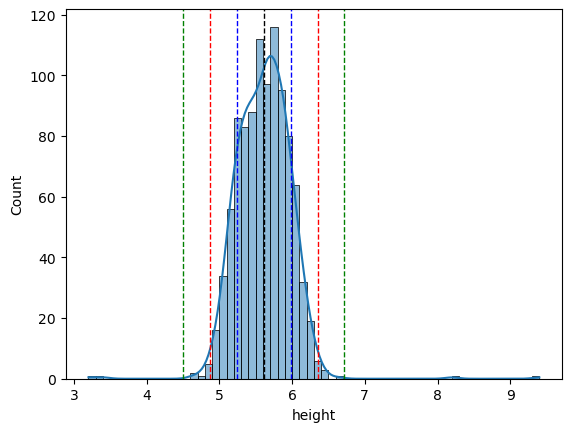

In [5]:
def draw_hist():
    sb.histplot(df["height"],kde=True)

    plt.axvline(mean,color="black",linestyle="dashed",linewidth=1)
    
    plt.axvline(mean-std,color="blue",linestyle="dashed",linewidth=1)
    plt.axvline(mean+std,color="blue",linestyle="dashed",linewidth=1)
    plt.axvline(mean-2*std,color="red",linestyle="dashed",linewidth=1)
    plt.axvline(mean+2*std,color="red",linestyle="dashed",linewidth=1)
    plt.axvline(mean-3*std,color="green",linestyle="dashed",linewidth=1)
    plt.axvline(mean+3*std,color="green",linestyle="dashed",linewidth=1)
    
    plt.show()

draw_hist()


In [6]:
lower=round(mean-3*std,2)
upper=round(mean+3*std,2)
lower,upper

(4.5, 6.72)

In [7]:
df_outliers=df[(df["height"]<lower) | (df["height"]>upper)]
df_outliers

,name,height
1,Deepika,8.2
16,Tanvi,3.2
57,Priya,3.4
76,Aarav,9.4


In [9]:
median=round(df["height"].median(),2)
median

5.62

In [10]:
# df["height"].replace([8.2,3.2,3.4,9.4],median,inplace=True)
# df.replace({"height":[8.2,3.2,3.4,9.4]},median,inplace=True)

# without doing manually try this
df["height"]=df["height"].apply(lambda x:median if x<lower or x>upper else x)


In [11]:
df[(df["height"]<lower) | (df["height"]>upper)]

,name,height


In [12]:
df.shape

(1000, 2)

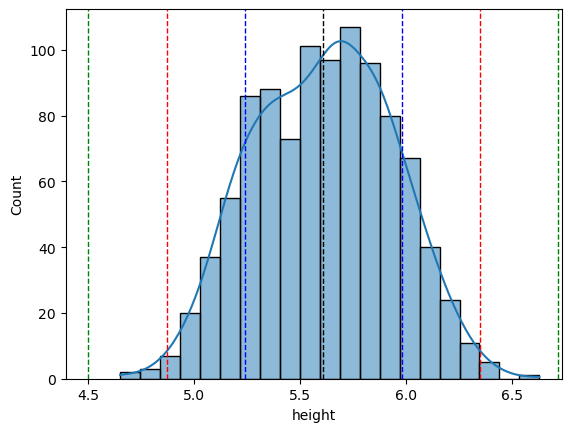

In [13]:
draw_hist()